In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

In [2]:
pga = pd.read_csv('pgaTourData.csv')
#display(pga.head(10))

print(pga.shape)
print(pga.info())

(2312, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player Name         2312 non-null   object 
 1   Rounds              1678 non-null   float64
 2   Fairway Percentage  1678 non-null   float64
 3   Year                2312 non-null   int64  
 4   Avg Distance        1678 non-null   float64
 5   gir                 1678 non-null   float64
 6   Average Putts       1678 non-null   float64
 7   Average Scrambling  1678 non-null   float64
 8   Average Score       1678 non-null   float64
 9   Points              2296 non-null   object 
 10  Wins                293 non-null    float64
 11  Top 10              1458 non-null   float64
 12  Average SG Putts    1678 non-null   float64
 13  Average SG Total    1678 non-null   float64
 14  SG:OTT              1678 non-null   float64
 15  SG:APR              1678 non-null   float64


In [3]:
pga.head()

,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,"$2,680,487"
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,"1,006",1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,"$2,485,203"
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,"1,020",NaN,3.0,0.192,0.674,0.183,0.437,-0.137,"$2,700,018"
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,"$1,986,608"
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,"$1,089,763"


In [4]:
#points are an object, because they have commas "," ad thousands separator
#delete the non numerical charachters and turn money into float, because they have thousands separator and "$"
pga['Money'] = pga['Money'].str.replace(r'\D', '').astype(float)

pga['Points'] = pga['Points'].str.replace(r'\D', '').astype(float)
pga

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/17715091.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  pga['Money'] = pga['Money'].str.replace(r'\D', '').astype(float)
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/17715091.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  pga['Points'] = pga['Points'].str.replace(r'\D', '').astype(float)


,Player Name,Rounds,Fairway Percentage,Year,Avg Distance,gir,Average Putts,Average Scrambling,Average Score,Points,Wins,Top 10,Average SG Putts,Average SG Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16943.0
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12827.0
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10159.0
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9165.0


In [5]:
pga.columns = pga.columns.str.replace(' ','_')
pga

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money
0,Henrik Stenson,60.0,75.19,2018,291.5,73.51,29.93,60.67,69.617,868.0,NaN,5.0,-0.207,1.153,0.427,0.960,-0.027,2680487.0
1,Ryan Armour,109.0,73.58,2018,283.5,68.22,29.31,60.13,70.758,1006.0,1.0,3.0,-0.058,0.337,-0.012,0.213,0.194,2485203.0
2,Chez Reavie,93.0,72.24,2018,286.5,68.67,29.12,62.27,70.432,1020.0,NaN,3.0,0.192,0.674,0.183,0.437,-0.137,2700018.0
3,Ryan Moore,78.0,71.94,2018,289.2,68.80,29.17,64.16,70.015,795.0,NaN,5.0,-0.271,0.941,0.406,0.532,0.273,1986608.0
4,Brian Stuard,103.0,71.44,2018,278.9,67.12,29.11,59.23,71.038,421.0,NaN,3.0,0.164,0.062,-0.227,0.099,0.026,1089763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,Carl Paulson,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16943.0
2308,Peter Tomasulo,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12827.0
2309,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10159.0
2310,Jesper Parnevik,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9165.0


In [6]:
pga.describe()

,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money
count,1678.000000,1678.000000,2312.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,2296.000000,293.000000,1458.000000,1678.000000,1678.000000,1678.000000,1678.000000,1678.000000,2.300000e+03
mean,78.711561,61.440560,2013.996107,290.807688,65.661675,29.163331,58.115638,70.921961,481.663328,1.218430,2.781893,0.025641,0.148105,0.037759,0.065015,0.019974,1.124903e+06
std,14.274137,5.058845,2.581176,8.916631,2.745411,0.518468,3.384769,0.698305,463.067732,0.573443,1.895094,0.343787,0.694923,0.379892,0.380952,0.223361,1.354085e+06
min,45.000000,43.020000,2010.000000,266.400000,53.540000,27.510000,44.010000,68.698000,1.000000,1.000000,1.000000,-1.475000,-3.209000,-1.717000,-1.680000,-0.930000,5.520000e+03
25%,69.000000,57.942500,2012.000000,284.900000,63.830000,28.810000,55.900000,70.494250,113.000000,1.000000,1.000000,-0.187000,-0.254750,-0.190250,-0.180750,-0.123000,1.853258e+05
50%,79.500000,61.430000,2014.000000,290.550000,65.790000,29.140000,58.275000,70.902000,381.500000,1.000000,2.000000,0.040000,0.147000,0.056000,0.081000,0.022000,6.994425e+05
75%,89.000000,64.910000,2016.000000,296.400000,67.580000,29.520000,60.420000,71.342750,676.000000,1.000000,4.000000,0.257000,0.568500,0.291500,0.314500,0.175000,1.526660e+06
max,120.000000,76.880000,2018.000000,319.700000,73.520000,31.000000,69.330000,74.400000,4169.000000,5.000000,14.000000,1.130000,2.406000,1.485000,1.533000,0.660000,1.203046e+07


# Adding the points won in the consecutive year

In [7]:
pga_test1 = pga[['Player_Name', 'Year', 'Points']]
pga_test1 = pga_test1.rename(columns={'Player_Name': 'Player_Name+1', 'Year': 'Year+1', 'Points':'Points_next_year'})
#pga_test1

In [8]:
for i in pga_test1.index:
    pga_test1['Year+1'][i] = pga_test1['Year+1'][i] -1
#pga_test1

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/779698421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_test1['Year+1'][i] = pga_test1['Year+1'][i] -1


In [9]:
pga = pd.merge(pga, pga_test1, left_on=["Player_Name", "Year"], right_on=["Player_Name+1", "Year+1"])
pga = pga.drop(columns=['Player_Name+1', 'Year+1'])
pga

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year
0,Ryan Armour,63.0,72.73,2017,278.8,69.96,29.88,58.31,70.965,222.0,NaN,1.0,-0.029,0.107,0.020,0.121,-0.005,443006.0,1006.0
1,Brian Stuard,93.0,71.49,2017,272.3,63.59,28.92,57.99,71.720,285.0,NaN,NaN,-0.137,-0.343,-0.340,0.171,-0.164,588806.0,421.0
2,Jim Furyk,54.0,70.75,2017,270.1,65.72,29.36,61.03,71.071,232.0,NaN,1.0,0.187,-0.023,-0.491,0.492,-0.036,558097.0,291.0
3,Chez Reavie,98.0,70.53,2017,284.8,66.91,28.64,63.28,70.244,666.0,NaN,3.0,0.417,0.762,0.121,0.375,-0.073,1819207.0,1020.0
4,William McGirt,89.0,70.06,2017,284.8,67.23,29.61,57.08,71.151,499.0,NaN,3.0,-0.025,-0.067,0.257,-0.193,-0.137,1225005.0,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,Jon Rahm,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1004035.0,1754.0
1633,Byeong Hun An,NaN,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,926797.0,468.0
1634,Joey Snyder III,NaN,NaN,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112800.0,85.0
1635,Marc Turnesa,NaN,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10159.0,175.0


# Czy występują duplikaty?

In [10]:
#W zbiorze nie występują duplikacje całkowite (ze względu na kombinacje Nazwiska gracza i roku)
pga[pga.duplicated(subset=['Player_Name', 'Year'])]

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year


# Dobór zmiennych do modelu

In [11]:
pga_columns = pga.columns
# ['Player_Name', 'Rounds', 'Fairway_Percentage', 'Year', 'Avg_Distance',
#       'gir', 'Average_Putts', 'Average_Scrambling', 'Average_Score', 'Points',
#       'Wins', 'Top_10', 'Average_SG_Putts', 'Average_SG_Total', 'SG:OTT',
#       'SG:APR', 'SG:ARG', 'Money', 'Points_next_year']

columns = list(pga_columns)
list_X = ['Rounds', 'Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Points', 'Wins', 'Top_10', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']
list_y = ['Points_next_year']

#print(pga_columns)

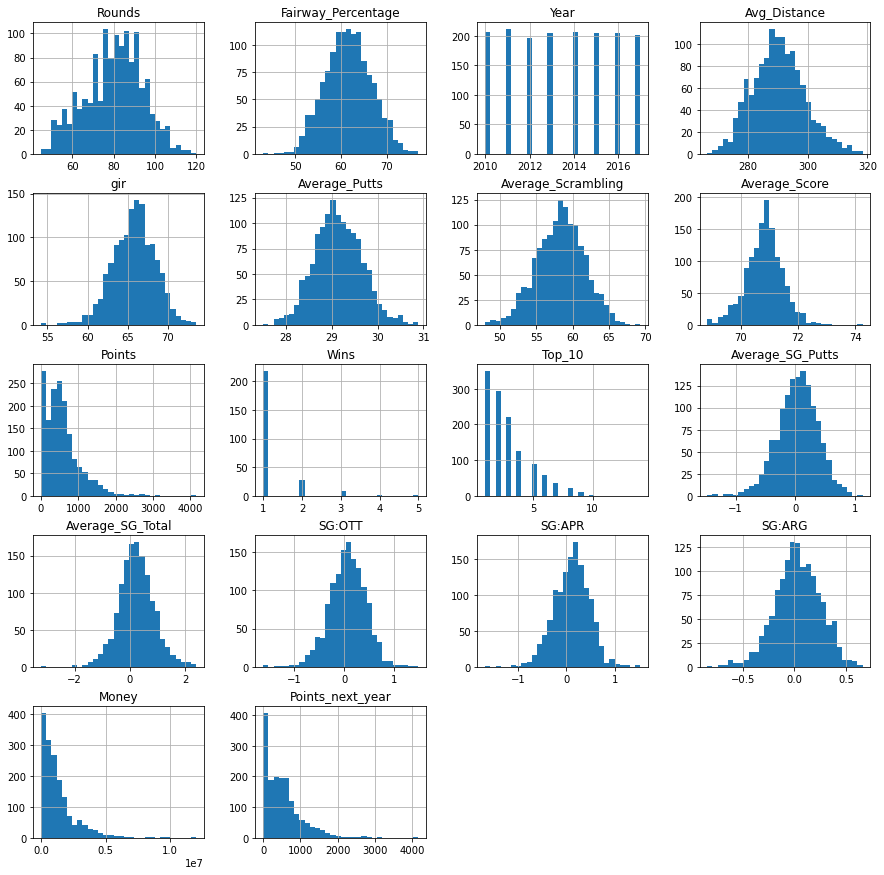

In [12]:
pga.hist(bins=30, figsize=(15, 15));

# Possible regression issues

1. Outliers
2. Multicollinearity
3. Normal distribution
4. Heteroscedasticity


In [13]:
pga.isna().sum()

Player_Name              0
Rounds                 320
Fairway_Percentage     320
Year                     0
Avg_Distance           320
gir                    320
Average_Putts          320
Average_Scrambling     320
Average_Score          320
Points                   8
Wins                  1380
Top_10                 428
Average_SG_Putts       320
Average_SG_Total       320
SG:OTT                 320
SG:APR                 320
SG:ARG                 320
Money                    6
Points_next_year         4
dtype: int64

In [14]:
pga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1636
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player_Name         1637 non-null   object 
 1   Rounds              1317 non-null   float64
 2   Fairway_Percentage  1317 non-null   float64
 3   Year                1637 non-null   int64  
 4   Avg_Distance        1317 non-null   float64
 5   gir                 1317 non-null   float64
 6   Average_Putts       1317 non-null   float64
 7   Average_Scrambling  1317 non-null   float64
 8   Average_Score       1317 non-null   float64
 9   Points              1629 non-null   float64
 10  Wins                257 non-null    float64
 11  Top_10              1209 non-null   float64
 12  Average_SG_Putts    1317 non-null   float64
 13  Average_SG_Total    1317 non-null   float64
 14  SG:OTT              1317 non-null   float64
 15  SG:APR              1317 non-null   float64
 16  SG:ARG

<AxesSubplot:>

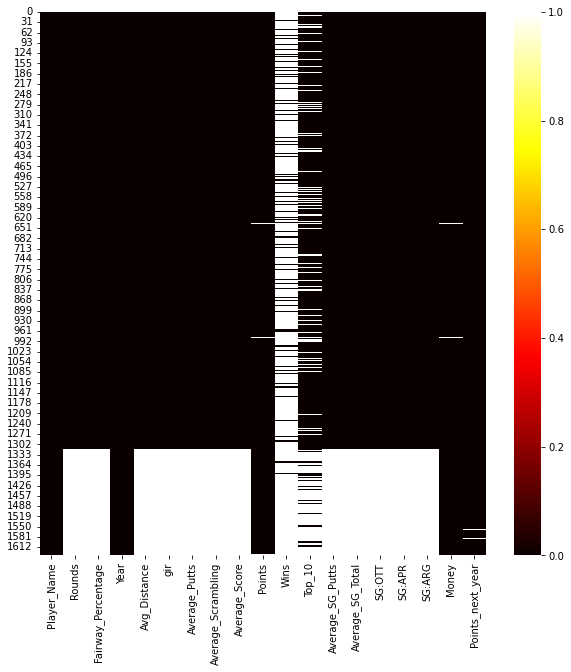

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(pga),cmap='hot')

In [16]:
#pga['Points_next_year_sqrtx2'] = np.sqrt(np.sqrt(pga['Points_next_year']))
#sns.pairplot(pga)

# Scenariusz 1 - wyłączenie zmiennych "Wins" oraz "Top_10"

In [17]:
pga_no_wins = pga.drop(columns=['Wins', 'Top_10', 'Player_Name', 'Money', 'Average_SG_Total'])
pga_no_wins.dropna(how='any', inplace = True)
#print(pga_no_wins.isna().sum())
pga_no_wins

,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Average_SG_Putts,SG:OTT,SG:APR,SG:ARG,Points_next_year
0,63.0,72.73,2017,278.8,69.96,29.88,58.31,70.965,222.0,-0.029,0.020,0.121,-0.005,1006.0
1,93.0,71.49,2017,272.3,63.59,28.92,57.99,71.720,285.0,-0.137,-0.340,0.171,-0.164,421.0
2,54.0,70.75,2017,270.1,65.72,29.36,61.03,71.071,232.0,0.187,-0.491,0.492,-0.036,291.0
3,98.0,70.53,2017,284.8,66.91,28.64,63.28,70.244,666.0,0.417,0.121,0.375,-0.073,1020.0
4,89.0,70.06,2017,284.8,67.23,29.61,57.08,71.151,499.0,-0.025,0.257,-0.193,-0.137,449.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1312,79.0,53.49,2010,291.7,66.51,29.36,58.86,71.171,234.0,0.171,-0.233,-0.211,0.044,456.0
1313,76.0,52.66,2010,299.1,65.13,28.79,61.84,69.966,1629.0,-0.147,0.185,0.738,0.228,1601.0
1314,63.0,52.21,2010,305.7,65.66,29.78,53.53,71.697,97.0,-0.653,0.336,-0.374,-0.298,110.0
1315,82.0,51.29,2010,292.9,65.88,29.14,58.46,70.953,554.0,0.252,-0.538,0.336,0.047,615.0


In [18]:
list_X1 = ['Rounds', 'Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Points', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']
list_y1 = ['Points_next_year']

# Scenariusz 2 - imputacja

In [19]:
# Replace NaN with 0 in Top 10 , BECAUSE they were MNAR
pga['Top_10'].fillna(0, inplace=True)
pga['Top_10'] = pga['Top_10'].astype(int)

# Replace NaN with 0 in # of wins
pga['Wins'].fillna(0, inplace=True)
pga['Wins'] = pga['Wins'].astype(int)

# Drop NaN values 
#df.dropna(axis = 0, inplace=True)


<AxesSubplot:>

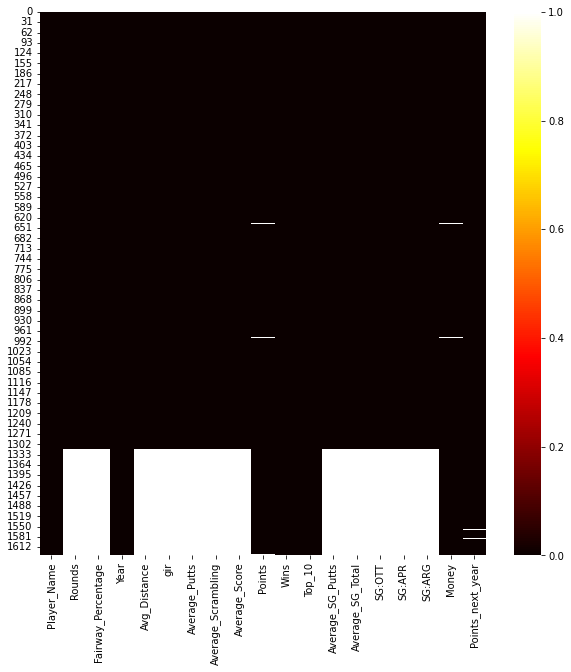

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(pga),cmap='hot')

In [21]:
pga_clean = pga.dropna(subset=['Rounds'], how='any')

print(pga_clean.isna().sum())
pga_clean.shape

Player_Name           0
Rounds                0
Fairway_Percentage    0
Year                  0
Avg_Distance          0
gir                   0
Average_Putts         0
Average_Scrambling    0
Average_Score         0
Points                3
Wins                  0
Top_10                0
Average_SG_Putts      0
Average_SG_Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
Money                 3
Points_next_year      0
dtype: int64


(1317, 19)

<AxesSubplot:>

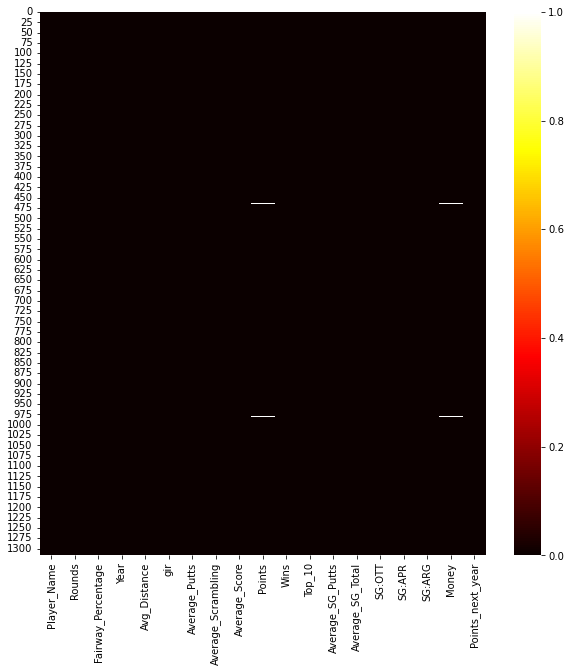

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(pga_clean),cmap='hot')

In [23]:
pga_clean[pga_clean['Points'].isnull()]

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,Wins,Top_10,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year
464,Patrick Rodgers,57.0,56.97,2015,307.7,66.77,28.98,56.47,70.619,NaN,0,0,-0.003,0.129,0.680,-0.456,-0.090,NaN,739.0
637,Brooks Koepka,56.0,56.91,2014,307.0,64.98,28.95,57.51,70.052,NaN,0,0,0.162,0.958,0.425,0.598,-0.226,NaN,1544.0
980,Ryo Ishikawa,54.0,53.28,2012,290.0,59.61,29.44,54.44,70.854,NaN,0,0,0.196,-0.038,-0.199,0.069,-0.104,NaN,298.0


<AxesSubplot:xlabel='Average_SG_Total', ylabel='Points'>

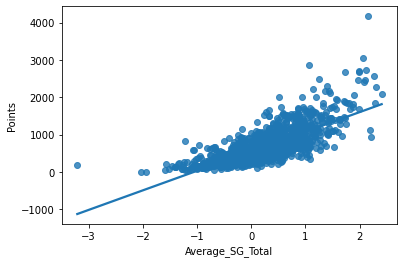

In [24]:
sns.regplot(data=pga_clean, 
            x="Average_SG_Total",
            y="Points",
            ci=None)

In [25]:
pga_clean['sqrt_Points'] = np.sqrt(pga['Points'])
pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga['Points']))
pga_clean['log_Points'] = np.log(pga['Points'])

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/3866320302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points'] = np.sqrt(pga['Points'])
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/3866320302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga['Points']))
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/3866320302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

Text(0, 0.5, 'Points^0.25')

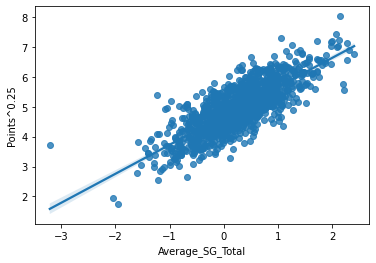

In [26]:
sns.regplot(data=pga_clean, 
            x="Average_SG_Total",
            y="sqrt_Points_x2")
plt.ylabel('Points^0.25')

In [27]:
model_missing = ols('sqrt_Points_x2 ~ Average_SG_Total', data = pga_clean, missing='drop').fit()
print(model_missing.params)

#model_missing.predict(pga.loc[[41, 713,901, 1287],'Average SG Total'])


Intercept           4.698928
Average_SG_Total    0.971678
dtype: float64


In [28]:
#sqrt_Point = intercept + slope * explanatory_data 

missing_Points = (model_missing.params[0] + model_missing.params[1]*pga_clean.loc[[464, 637,980],
                                                                                  'Average_SG_Total'])**4
pga_clean.loc[[464, 637,980],'Points'] = missing_Points
missing_Points



/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


464     541.661575
637    1004.547745
980     472.379050
Name: Average_SG_Total, dtype: float64

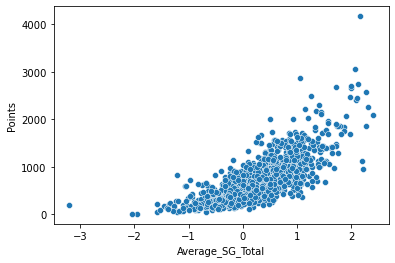

In [29]:
sns.scatterplot(data=pga_clean, 
            x="Average_SG_Total",
            y="Points",
            ci=None)

sns.scatterplot(x=pga_clean.loc[[41, 713,901, 1287],'Average_SG_Total'], y=missing_Points, color='red')
plt.show()

In [30]:
pga_clean.isna().sum()

Player_Name           0
Rounds                0
Fairway_Percentage    0
Year                  0
Avg_Distance          0
gir                   0
Average_Putts         0
Average_Scrambling    0
Average_Score         0
Points                0
Wins                  0
Top_10                0
Average_SG_Putts      0
Average_SG_Total      0
SG:OTT                0
SG:APR                0
SG:ARG                0
Money                 3
Points_next_year      0
sqrt_Points           3
sqrt_Points_x2        3
log_Points            3
dtype: int64

In [31]:
#pga_clean = pga_clean.drop(columns='sqrt_Points')
#pga_clean

# Correlations and distributions

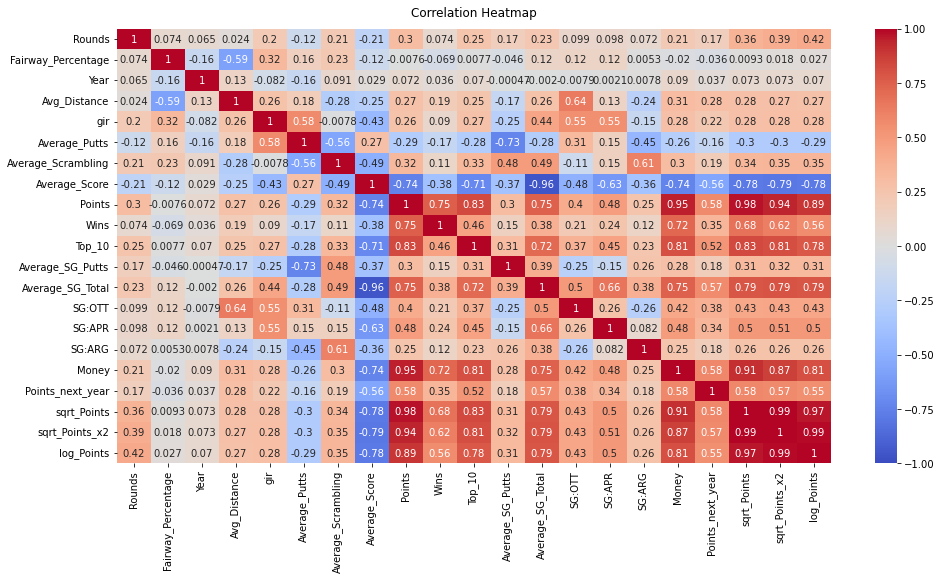

In [32]:
plt.figure(figsize=(16,8))
heatmap = sns.heatmap(pga_clean.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='sqrt_Points_x2', ylabel='Count'>

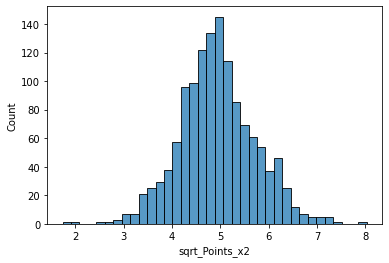

In [33]:
sns.histplot(pga_clean['sqrt_Points_x2'])

In [34]:
#sns.pairplot(pga_clean)

In [35]:
pga_clean['sqrt_Points'] = np.sqrt(pga_clean['Points'])
pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga_clean['Points']))
pga_clean['log_Points'] = np.log(pga_clean['Points'])

/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/2493100938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points'] = np.sqrt(pga_clean['Points'])
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/2493100938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pga_clean['sqrt_Points_x2'] = np.sqrt(np.sqrt(pga_clean['Points']))
/var/folders/1k/qmqq8bb52d53jfplbrl37dtc0000gn/T/ipykernel_19534/2493100938.py:3: SettingWithCopyWarning: 
A value is trying to be s

# Looking for outliers in pga_clean

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Points'>

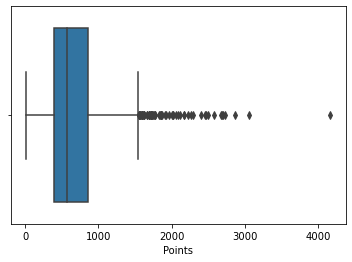

In [36]:
sns.boxplot(pga_clean["Points"])

In [37]:
IQR = pga_clean.quantile(0.75) - pga_clean.quantile(0.25)
IQR
LOW = pga_clean.quantile(0.25) - IQR
HIGH = pga_clean.quantile(0.75) + IQR

In [38]:
round(LOW, 2)

Rounds                    52.00
Fairway_Percentage        51.18
Year                    2008.00
Avg_Distance             273.00
gir                       60.44
Average_Putts             28.08
Average_Scrambling        51.70
Average_Score             69.66
Points                   -74.00
Wins                       0.00
Top_10                    -2.00
Average_SG_Putts          -0.61
Average_SG_Total          -0.95
SG:OTT                    -0.64
SG:APR                    -0.61
SG:ARG                    -0.41
Money                -575421.25
Points_next_year        -282.00
sqrt_Points               10.27
sqrt_Points_x2             3.48
log_Points                 5.18
dtype: float64

In [39]:
round(HIGH, 2)

Rounds                    109.00
Fairway_Percentage         71.85
Year                     2020.00
Avg_Distance              307.20
gir                        71.09
Average_Putts              30.21
Average_Scrambling         64.93
Average_Score              71.98
Points                   1318.00
Wins                        0.00
Top_10                      7.00
Average_SG_Putts            0.71
Average_SG_Total            1.40
SG:OTT                      0.79
SG:APR                      0.82
SG:ARG                      0.48
Money                 3244412.75
Points_next_year         1365.00
sqrt_Points                38.70
sqrt_Points_x2              6.37
log_Points                  7.53
dtype: float64

In [40]:
pga_clean[pga_clean['Points']>HIGH['Points']]

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,...,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year,sqrt_Points,sqrt_Points_x2,log_Points
18,Kevin Kisner,105.0,67.00,2017,288.7,66.43,28.79,62.50,70.294,1612.0,...,0.388,1.148,0.257,0.334,0.065,4766936.0,971.0,40.149720,6.336381,7.385231
49,Rickie Fowler,78.0,63.29,2017,300.5,66.98,28.32,62.85,69.083,1832.0,...,0.852,1.875,0.378,0.408,0.349,6083197.0,1302.0,42.801869,6.542314,7.513164
53,Adam Hadwin,98.0,62.85,2017,290.7,64.89,28.43,63.47,70.583,1347.0,...,0.409,0.640,0.003,0.183,-0.044,3455012.0,638.0,36.701499,6.058176,7.205635
63,Brian Harman,104.0,62.07,2017,289.6,63.19,28.30,62.74,70.402,1557.0,...,0.600,0.581,0.015,-0.198,0.329,4396470.0,1056.0,39.458839,6.281627,7.350516
70,Pat Perez,93.0,61.46,2017,290.6,66.04,28.66,63.38,70.250,1461.0,...,0.346,0.877,-0.147,0.222,0.440,4361400.0,1116.0,38.223030,6.182478,7.286876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,Ernie Els,72.0,60.16,2010,288.4,67.86,28.99,61.23,69.843,1846.0,...,0.330,1.322,0.215,0.735,0.043,4558861.0,357.0,42.965102,6.554777,7.520776
1300,Dustin Johnson,83.0,56.35,2010,308.5,67.95,29.37,55.81,70.135,1362.0,...,0.112,0.979,0.760,0.288,-0.179,4473122.0,1191.0,36.905284,6.074972,7.216709
1303,Bubba Watson,77.0,55.67,2010,309.8,68.54,29.40,55.50,70.229,1498.0,...,-0.077,0.695,0.798,0.140,-0.168,3198998.0,1577.0,38.704005,6.221254,7.311886
1304,Jeff Overton,89.0,55.44,2010,297.3,66.86,29.04,56.80,70.497,1536.0,...,0.409,0.630,0.232,0.064,-0.074,3456356.0,611.0,39.191836,6.260338,7.336937


In [41]:
pga_clean[pga_clean['Points']<LOW['Points']]

,Player_Name,Rounds,Fairway_Percentage,Year,Avg_Distance,gir,Average_Putts,Average_Scrambling,Average_Score,Points,...,Average_SG_Putts,Average_SG_Total,SG:OTT,SG:APR,SG:ARG,Money,Points_next_year,sqrt_Points,sqrt_Points_x2,log_Points


In [42]:
pga_no_outliers = pga_clean[pga_clean['Points']<HIGH['Points']]
len(pga_no_outliers)

1194

# REGRESSION STATSMODELS

Datasets: pga_clean; pga_small

1. Statsmodels regression
2. Metrics
3. Improvement of the model

In [43]:
Years_model = [2010, 2011, 2012, 2013, 2014, 2015, 2016]
Year_test = 2017


pga_no_wins_test = pga_no_wins[pga_no_wins['Year'] == 2017]
pga_no_wins = pga_no_wins.query('Year == [2010, 2011, 2012, 2013, 2014, 2015, 2016]')

pga_clean_test = pga_clean[pga_clean['Year'] == 2017]
pga_clean = pga_clean.query('Year == [2010, 2011, 2012, 2013, 2014, 2015, 2016]')


pga_no_outliers_test = pga_no_outliers[pga_no_outliers['Year'] == 2017]
pga_no_outliers = pga_no_outliers.query('Year == [2010, 2011, 2012, 2013, 2014, 2015, 2016]')


In [44]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

## Scenariusz 1 - wersja inicjalna

In [45]:
# SCENARIUSZ 1 - REGRESSION NO wins or top_10 X VS. POINTS_next_year

X = pga_no_wins[pga_no_wins.columns.intersection(list_X1)]
#X = sm.tools.add_constant(X)
y = pga_no_wins["Points_next_year"]
#y = pga_no_wins["Points_next_year_sqrtx2"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Points_next_year   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.759
Method:                 Least Squares   F-statistic:                              301.9
Date:                Fri, 09 Sep 2022   Prob (F-statistic):                        0.00
Time:                        07:04:09   Log-Likelihood:                         -8465.1
No. Observations:                1149   AIC:                                  1.695e+04
Df Residuals:                    1137   BIC:                                  1.701e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rounds                 0.9383      0.928      1.012      0.312      -0.882       2.758
Fairway_Percentage    -5.4569      4.793     -1.139      0.255     -14.861       3.947
Avg_Distance           0.7063      3.377      0.209      0.834      -5.920       7.332
gir                   -3.6203      9.548     -0.379      0.705     -22.354      15.114
Average_Putts         -6.5149     53.392     -0.122      0.903    -111.273      98.244
Average_Scrambling    -7.7601      5.608     -1.384      0.167     -18.763       3.242
Average_Score         17.6004     24.542      0.717      0.473     -30.552      65.752
Points                 0.3405      0.041      8.206      0.000       0.259       0.422
Average_SG_Putts     239.6486     54.331      4.411      0.000     133.049     346.248
SG:OTT               421.6560     82.534      5.109      0.000     259.720     583.592
SG:APR               201.9705     50.761      3.979      0.000     102.374     301.567
SG:ARG               358.4093     73.512      4.876      0.000     214.175     502.643
==============================================================================
Omnibus:                      328.129   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1574.226
Skew:                           1.250   Prob(JB):                         0.00
Kurtosis:                       8.160   Cond. No.                     7.51e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suma składników losowych: 65.85598396936803
Błąd standardowy składników losowych: 383.3105250635953


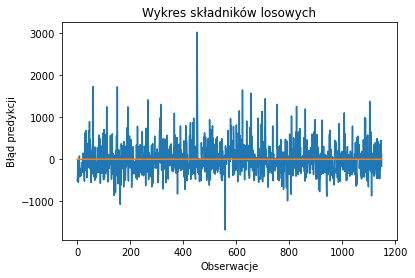

In [46]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Test scenariusza 1 na obserwacjach z roku 2017 - wersja inicjalna

Suma składników losowych: -1629.831089771235
Błąd standardowy składników losowych: 373.9891682962481


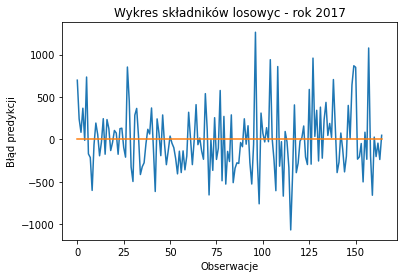

In [47]:
X_test = pga_no_wins_test[pga_no_wins_test.columns.intersection(list_X1)]
y_test = pga_no_wins_test["Points_next_year"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowyc - rok 2017')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Scenariusz 1

In [63]:
#Model 1 improvement - deleting variables that are not statistically significant
list_X1_del = ['Fairway_Percentage', 'Average_Scrambling',
          'Average_Score', 'Points', 'Average_SG_Putts', 'SG:OTT', 'SG:ARG']
list_y = ['Points_next_year']

#DELETED: 'Average_Scrambling', 'Average_Putts','SG:ARG', 'Average_SG_Putts',

X = pga_no_wins[pga_no_wins.columns.intersection(list_X1_del)]
X = sm.tools.add_constant(X)
y = pga_no_wins["Points_next_year"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

errors = y-predictions
print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Points_next_year   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     102.2
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          5.13e-116
Time:                        07:05:16   Log-Likelihood:                -8464.5
No. Observations:                1149   AIC:                         1.695e+04
Df Residuals:                    1141   BIC:                         1.699e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.298e+04   2681.545      4.841      0.000    7718.818    1.82e+04
Fairway_Percentage    -6.7429      2.444     -2.759      0.006     -11.539      -1.947
Average_Scrambling    -8.7306      5.294     -1.649      0.099     -19.117       1.656
Average_Score       -165.3160     36.340     -4.549      0.000    -236.617     -94.015
Points                 0.3514      0.039      8.929      0.000       0.274       0.429
Average_SG_Putts      76.5205     45.664      1.676      0.094     -13.075     166.116
SG:OTT               249.1828     50.989      4.887      0.000     149.141     349.225
SG:ARG               200.0153     74.057      2.701      0.007      54.712     345.318
==============================================================================
Omnibus:                      322.881   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1557.740
Skew:                           1.227   Prob(JB):                         0.00
Kurtosis:                       8.150   Cond. No.                     1.95e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suma składników losowych: -1.4792021829634905e-08
Błąd standardowy składników losowych: 383.13060587239664


Suma składników losowych: -1.4792021829634905e-08
Błąd standardowy składników losowych: 383.13060587239664


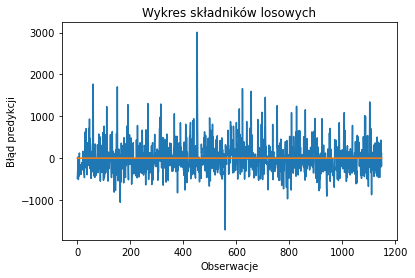

In [64]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

Suma składników losowych: -763.5374138544803
Błąd standardowy składników losowych: 376.6809622505058


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


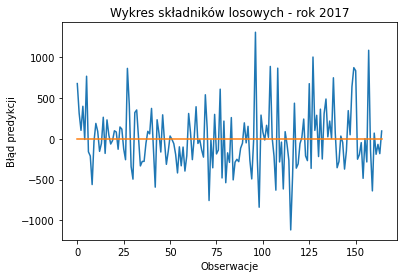

In [65]:
X_test = pga_no_wins_test[pga_no_wins_test.columns.intersection(list_X1_del)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_no_wins_test["Points_next_year"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych - rok 2017')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')
plt.plot()

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

In [50]:
list_X = ['Rounds', 'Fairway_Percentage', 'Avg_Distance', 'gir', 'Average_Putts', 'Average_Scrambling',
          'Average_Score', 'Points', 'Wins', 'Top_10', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']
list_y = ['Points_next_year']

## Scenariusz 2 - wersja inicjalna

In [51]:
# SCENARIUSZ 2 - REGRESSION CLEAN LIST_X VS. POINTS

X = pga_clean[pga_clean.columns.intersection(list_X)]
#X = sm.tools.add_constant(X)
y = pga_clean["Points_next_year"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Points_next_year   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.760
Method:                 Least Squares   F-statistic:                              260.9
Date:                Fri, 09 Sep 2022   Prob (F-statistic):                        0.00
Time:                        07:04:09   Log-Likelihood:                         -8485.0
No. Observations:                1152   AIC:                                  1.700e+04
Df Residuals:                    1138   BIC:                                  1.707e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rounds                 0.3562      0.969      0.368      0.713      -1.544       2.257
Fairway_Percentage    -4.9917      4.784     -1.044      0.297     -14.377       4.394
Avg_Distance           1.1258      3.367      0.334      0.738      -5.480       7.732
gir                   -3.2755      9.475     -0.346      0.730     -21.866      15.315
Average_Putts         -5.5621     52.956     -0.105      0.916    -109.465      98.340
Average_Scrambling    -8.1363      5.605     -1.452      0.147     -19.134       2.862
Average_Score         15.0719     24.488      0.615      0.538     -32.974      63.118
Points                 0.4445      0.088      5.049      0.000       0.272       0.617
Wins                 -77.9730     41.598     -1.874      0.061    -159.590       3.644
Top_10                 0.0359     11.259      0.003      0.997     -22.055      22.126
Average_SG_Putts     215.0681     55.279      3.891      0.000     106.607     323.529
SG:OTT               383.4867     84.071      4.561      0.000     218.535     548.438
SG:APR               173.6741     52.592      3.302      0.001      70.487     276.862
SG:ARG               331.0150     74.189      4.462      0.000     185.453     476.577
==============================================================================
Omnibus:                      319.922   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1385.993
Skew:                           1.247   Prob(JB):                    1.09e-301
Kurtosis:                       7.760   Cond. No.                     7.81e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

import patsy
patsy.__version__

Suma składników losowych: 59.449008423591295
Błąd standardowy składników losowych: 382.56785111979804


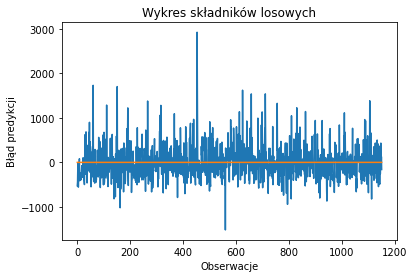

In [52]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Test scenariusza 2 na obserwacjach z roku 2017 - wersja inicjalna

Suma składników losowych: -523.5631748179236
Błąd standardowy składników losowych: 372.62756290509884


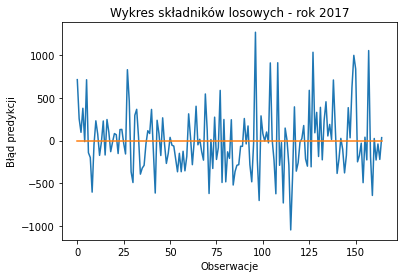

In [53]:
X_test = pga_clean_test[pga_clean_test.columns.intersection(list_X)]
y_test = pga_clean_test["Points_next_year"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych - rok 2017')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Scenariusz 2

In [66]:
#Model 2 improvement - deleting variables that are not statistically significant
list_X_del = ['Fairway_Percentage', 
          'Average_Score', 'Points', 'Wins', 'SG:OTT', 'SG:ARG']
list_y = ['Points_next_year']

# DELETED: 'Fairway_Percentage', 'Avg_Distance','Average_Putts',

X = pga_clean[pga_clean.columns.intersection(list_X_del)]
X = sm.tools.add_constant(X)
y = pga_clean["Points_next_year"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

errors = y-predictions
print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Points_next_year   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     120.3
Date:                Fri, 09 Sep 2022   Prob (F-statistic):          7.55e-118
Time:                        07:06:52   Log-Likelihood:                -8486.1
No. Observations:                1152   AIC:                         1.699e+04
Df Residuals:                    1145   BIC:                         1.702e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.147e+04   2420.460      4.738      0.000    6718.415    1.62e+04
Fairway_Percentage    -8.2901      2.314     -3.583      0.000     -12.830      -3.750
Average_Score       -150.4528     33.461     -4.496      0.000    -216.105     -84.801
Points                 0.4565      0.059      7.712      0.000       0.340       0.573
Wins                 -79.9866     35.763     -2.237      0.026    -150.154      -9.819
SG:OTT               218.0876     42.476      5.134      0.000     134.748     301.427
SG:ARG               121.7656     64.668      1.883      0.060      -5.116     248.647
==============================================================================
Omnibus:                      314.462   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.990
Skew:                           1.234   Prob(JB):                    3.16e-288
Kurtosis:                       7.636   Cond. No.                     1.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suma składników losowych: -1.4149918570183218e-08
Błąd standardowy składników losowych: 382.9583560604023


Suma składników losowych: -1.4149918570183218e-08
Błąd standardowy składników losowych: 382.9583560604023


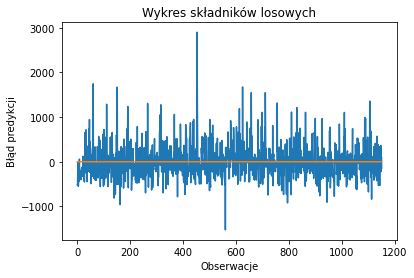

In [67]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

Suma składników losowych: -1005.0082362812013
Błąd standardowy składników losowych: 375.7640618285396


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


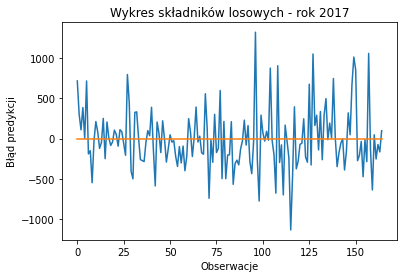

In [68]:
X_test = pga_clean_test[pga_clean_test.columns.intersection(list_X_del)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_clean_test["Points_next_year"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych - rok 2017')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Scenariusz 3 - wersja inicjalna

In [56]:
# SCENARIUSZ 3 - REGRESSION NO_OUTLIERS LIST_X VS. POINTS

X = pga_no_outliers[pga_no_outliers.columns.intersection(list_X)]
y = pga_no_outliers["Points_next_year"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Points_next_year   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              220.3
Date:                Fri, 09 Sep 2022   Prob (F-statistic):                   1.19e-297
Time:                        07:04:10   Log-Likelihood:                         -7566.7
No. Observations:                1043   AIC:                                  1.516e+04
Df Residuals:                    1029   BIC:                                  1.523e+04
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rounds                -0.1778      0.941     -0.189      0.850      -2.025       1.669
Fairway_Percentage    -6.8505      4.495     -1.524      0.128     -15.671       1.970
Avg_Distance          -1.0313      3.159     -0.326      0.744      -7.231       5.168
gir                   -1.6224      8.893     -0.182      0.855     -19.073      15.828
Average_Putts         45.2076     49.683      0.910      0.363     -52.283     142.698
Average_Scrambling    -9.4493      5.220     -1.810      0.071     -19.693       0.794
Average_Score          4.9317     22.895      0.215      0.829     -39.994      49.857
Points                 0.4146      0.094      4.407      0.000       0.230       0.599
Wins                 -48.4741     45.473     -1.066      0.287    -137.705      40.757
Top_10                -3.6688     11.092     -0.331      0.741     -25.434      18.096
Average_SG_Putts     265.0785     52.710      5.029      0.000     161.646     368.510
SG:OTT               386.7802     80.297      4.817      0.000     229.215     544.345
SG:APR               190.1504     50.900      3.736      0.000      90.271     290.030
SG:ARG               356.2983     69.710      5.111      0.000     219.509     493.088
==============================================================================
Omnibus:                      186.653   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.652
Skew:                           1.039   Prob(JB):                     1.20e-81
Kurtosis:                       5.064   Cond. No.                     6.63e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Suma składników losowych: 45.483681130495825
Błąd standardowy składników losowych: 342.506804158372


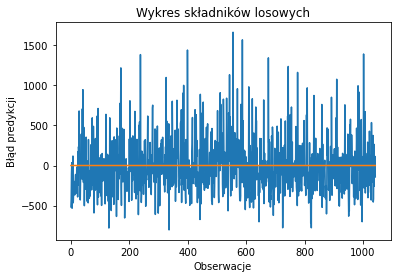

In [57]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Test scenariusza 3 na obserwacjach z roku 2017 - wersja inicjalna

Suma składników losowych: 2790.5810150772736
Błąd standardowy składników losowych: 347.9671078239992


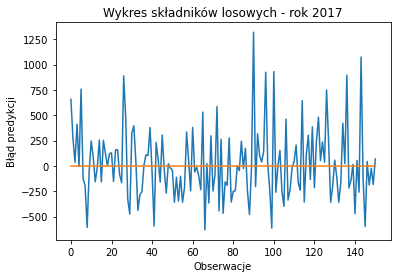

In [58]:
X_test = pga_no_outliers_test[pga_no_outliers_test.columns.intersection(list_X)]
y_test = pga_no_outliers_test["Points_next_year"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych - rok 2017')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

## Scenariusz 3

In [71]:
#Model 3 improvement - deleting variables that are not statistically significant
list_X_del = ['Fairway_Percentage', 'Average_Scrambling',
          'Points', 'Average_SG_Putts', 'SG:OTT', 'SG:APR', 'SG:ARG']
list_y = ['Points_next_year']

#DELETED 'Avg_Distance',

X = pga_no_outliers[pga_no_outliers.columns.intersection(list_X_del)]
X = sm.tools.add_constant(X)
y = pga_no_outliers["Points_next_year"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
display(model.summary())

errors = y-predictions
print(errors.sum(), 2)
print(errors.std())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Points_next_year   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     65.61
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           2.85e-78
Time:                        07:08:16   Log-Likelihood:                -7567.4
No. Observations:                1043   AIC:                         1.515e+04
Df Residuals:                    1035   BIC:                         1.519e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1300.9481    277.001      4.697      0.000     757.401    1844.496
Fairway_Percentage    -5.2305      2.312     -2.262      0.024      -9.768      -0.693
Average_Scrambling   -11.5196      4.892     -2.355      0.019     -21.118      -1.921
Points                 0.3386      0.054      6.255      0.000       0.232       0.445
Average_SG_Putts     243.7369     43.630      5.586      0.000     158.123     329.351
SG:OTT               385.2135     40.659      9.474      0.000     305.429     464.997
SG:APR               203.6273     37.554      5.422      0.000     129.937     277.318
SG:ARG               358.6298     65.703      5.458      0.000     229.703     487.557
==============================================================================
Omnibus:                      186.271   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              370.040
Skew:                           1.039   Prob(JB):                     4.43e-81
Kurtosis:                       5.049   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

9.476934792473912e-09 2
342.7275647009981


Suma składników losowych: 9.476934792473912e-09
Błąd standardowy składników losowych: 342.7275647009981


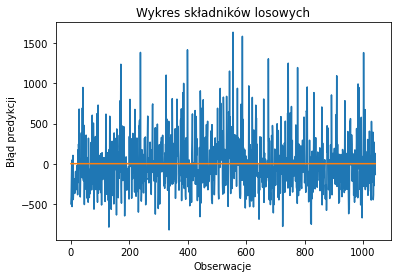

In [72]:
errors = y-predictions

plt.plot(np.arange(0, len(y)), errors)
plt.plot(np.arange(0, len(y)), np.zeros([len(y),]))
plt.title('Wykres składników losowych')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())

Suma składników losowych: 1289.662655343674
Błąd standardowy składników losowych: 348.245868110432


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


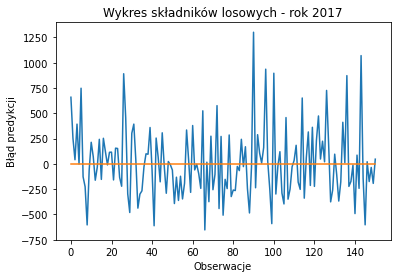

In [73]:
X_test = pga_no_outliers_test[pga_no_outliers_test.columns.intersection(list_X_del)]
X_test = sm.tools.add_constant(X_test)
y_test = pga_no_outliers_test["Points_next_year"]
predictions = model.predict(X_test)

errors = y_test-predictions

plt.plot(np.arange(0, len(y_test)), errors)
plt.plot(np.arange(0, len(y_test)), np.zeros([len(y_test),]))
plt.title('Wykres składników losowych - rok 2017')
plt.xlabel('Obserwacje')
plt.ylabel('Błąd predykcji')

print("Suma składników losowych:", errors.sum())
print("Błąd standardowy składników losowych:", errors.std())